## Bitcoin Zaman Serisi Analizi

#Gerekli kütüphanelerin kurulması

In [41]:
pip install pandas 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install numpy matplotlib seaborn plotly 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
pip install jupyter scikit-learn statsmodels yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import seaborn as sns


Keşifsel veri analizi

In [45]:
import pandas as pd

df = pd.read_csv("data/btc_1d_data_2018_to_2025.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2700 non-null   object 
 1   Open                          2700 non-null   float64
 2   High                          2700 non-null   float64
 3   Low                           2700 non-null   float64
 4   Close                         2700 non-null   float64
 5   Volume                        2700 non-null   float64
 6   Close time                    2700 non-null   object 
 7   Quote asset volume            2700 non-null   float64
 8   Number of trades              2700 non-null   int64  
 9   Taker buy base asset volume   2700 non-null   float64
 10  Taker buy quote asset volume  2700 non-null   float64
 11  Ignore                        2700 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 253.3+ KB


Dikkat Edilmesi Gerekenler
Open time ve Close time sütunları şu an object (string) tipinde, bunları datetime tipine çevirmelisin.

Ignore sütunu büyük ihtimalle işine yaramaz, ileride onu çıkarabilirsin.

In [46]:
df.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2.700000e+03,2.700000e+03,2700.000000,2.700000e+03,2700.0
mean,31492.678493,32178.673726,30759.397378,31523.044937,68310.697764,1.769120e+09,1.707199e+06,33955.470304,8.759912e+08,0.0
std,26077.402717,26518.747208,25621.965938,26102.825054,79894.081170,1.999387e+09,2.103979e+06,39758.699543,9.940853e+08,0.0
min,3211.710000,3276.500000,3156.260000,3211.720000,300.986860,1.177017e+07,1.241700e+04,151.876190,6.532639e+06,0.0
25%,9203.042500,9376.830000,8981.675000,9203.042500,28444.667668,3.587383e+08,3.956268e+05,14243.066352,1.813777e+08,0.0
50%,23936.645000,24549.795000,23467.925000,23947.125000,43681.327938,1.059653e+09,9.926025e+05,21811.092690,5.179676e+08,0.0
75%,46956.735000,48155.000000,45609.545000,46976.092500,71155.137407,2.487150e+09,1.893604e+06,35384.207525,1.244527e+09,0.0
max,111696.220000,111800.000000,111201.860000,111340.180000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


In [47]:
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [48]:

df.head()


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [49]:
import pandas as pd

df = pd.read_csv("data/btc_1d_data_2018_to_2025.csv")
df.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2695,2025-05-19,106454.27,107108.62,104742.53,105140.00,3542.14220,2025-05-19 23:59:59.999,3.751447e+08,736569,1937.64636,2.053688e+08,0
2696,2025-05-20,105573.73,106789.58,105554.31,106577.64,3349.44430,2025-05-20 23:59:59.999,3.554848e+08,527844,1911.06311,2.028472e+08,0
2697,2025-05-21,106850.00,107206.94,106400.00,106400.00,1252.62742,2025-05-21 23:59:59.999,1.337861e+08,337467,518.63094,5.540490e+07,0
2698,2025-05-22,109643.99,110576.70,109177.37,109945.54,3967.13002,2025-05-22 23:59:59.999,4.361191e+08,751982,2172.88802,2.389061e+08,0
2699,2025-05-23,111696.22,111800.00,111201.86,111340.18,1702.14192,2025-05-23 23:59:59.999,1.897412e+08,373745,912.13208,1.016736e+08,0


#Veri Temizleme ve Dönüşümleri

Yapılacaklar:
Tarih sütunlarını (Open time, Close time) datetime formatına çevir.

Ignore sütununu veri setinden kaldır.

In [50]:
# 1. Tarih sütunlarını datetime yap
df['Open time'] = pd.to_datetime(df['Open time'])
df['Close time'] = pd.to_datetime(df['Close time'])


In [51]:
# 2. Ignore sütununu kaldır
df = df.drop(columns=['Ignore'])

In [52]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     2700 non-null   datetime64[ns]
 1   Open                          2700 non-null   float64       
 2   High                          2700 non-null   float64       
 3   Low                           2700 non-null   float64       
 4   Close                         2700 non-null   float64       
 5   Volume                        2700 non-null   float64       
 6   Close time                    2700 non-null   datetime64[ns]
 7   Quote asset volume            2700 non-null   float64       
 8   Number of trades              2700 non-null   int64         
 9   Taker buy base asset volume   2700 non-null   float64       
 10  Taker buy quote asset volume  2700 non-null   float64       
dtypes: datetime64[ns](2), float64(

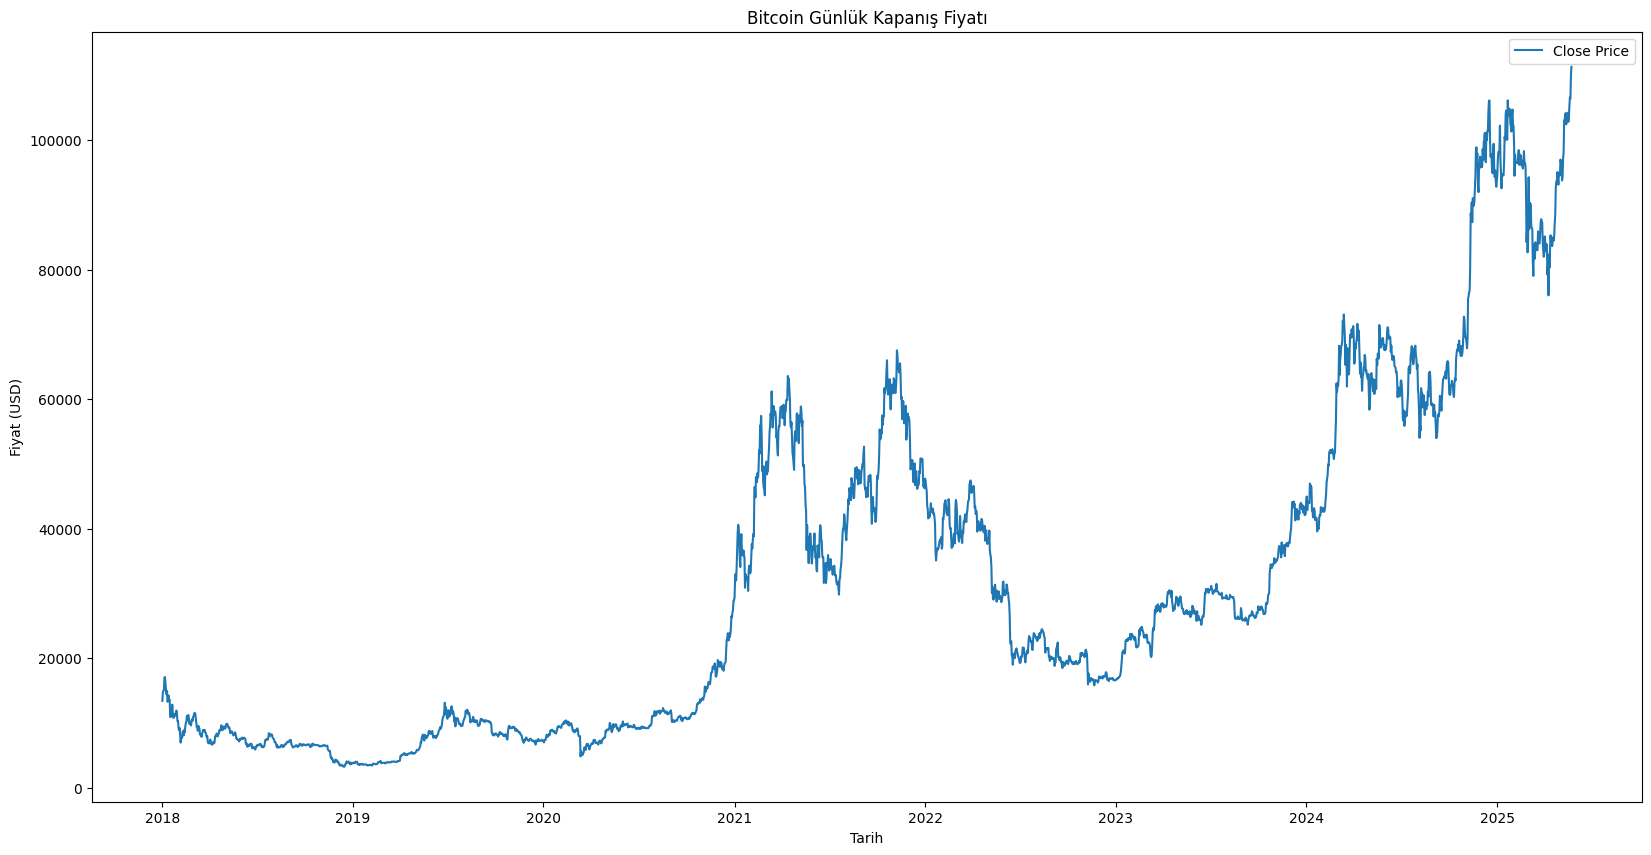

In [54]:
import matplotlib.pyplot as plt

# 1. Kapanış fiyatının zaman serisi grafiği
plt.figure(figsize=(20,10))
plt.plot(df['Open time'], df['Close'], label='Close Price')
plt.title('Bitcoin Günlük Kapanış Fiyatı')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

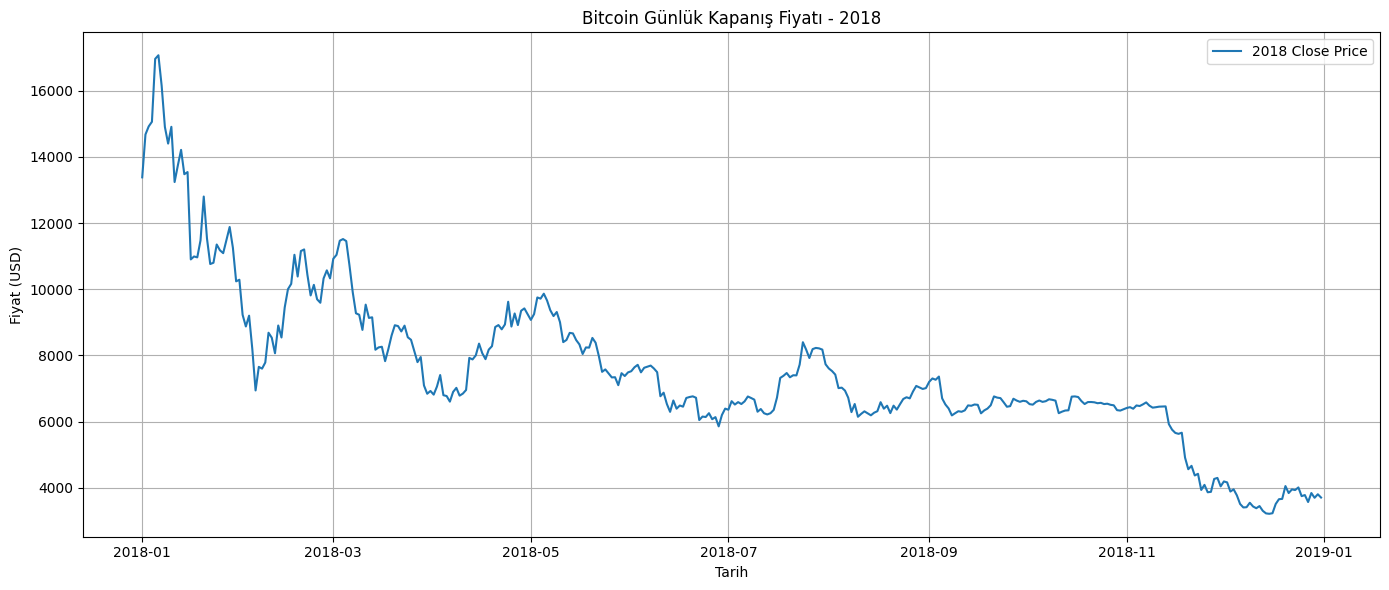

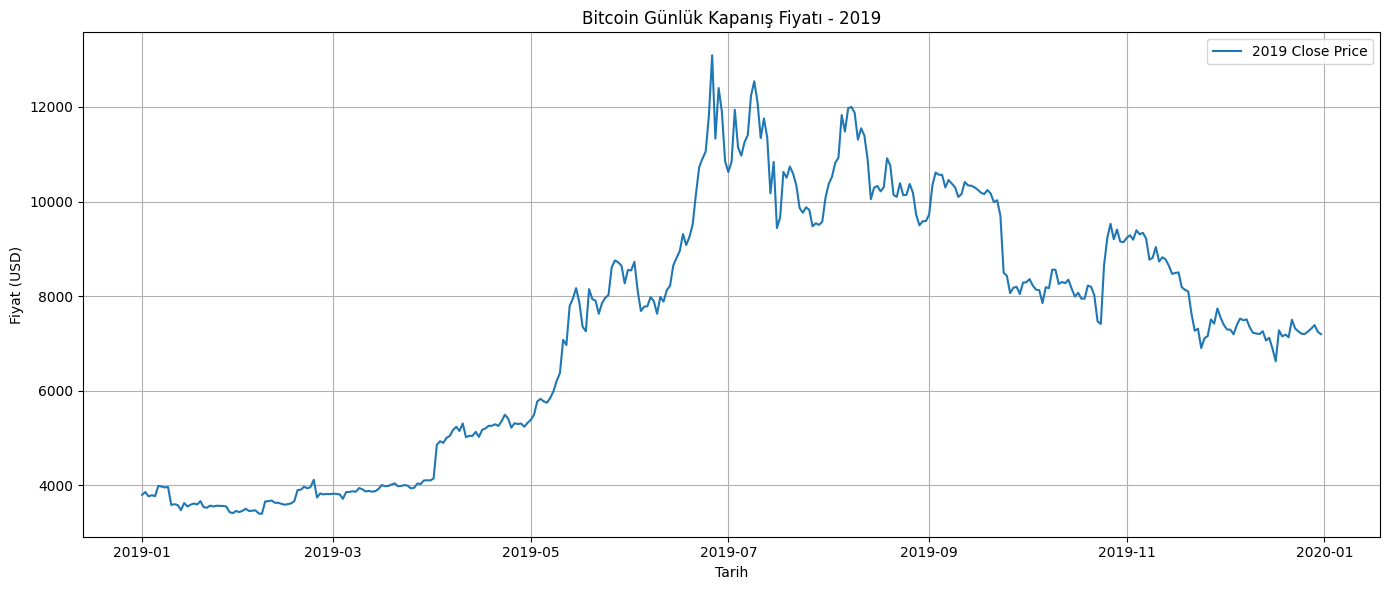

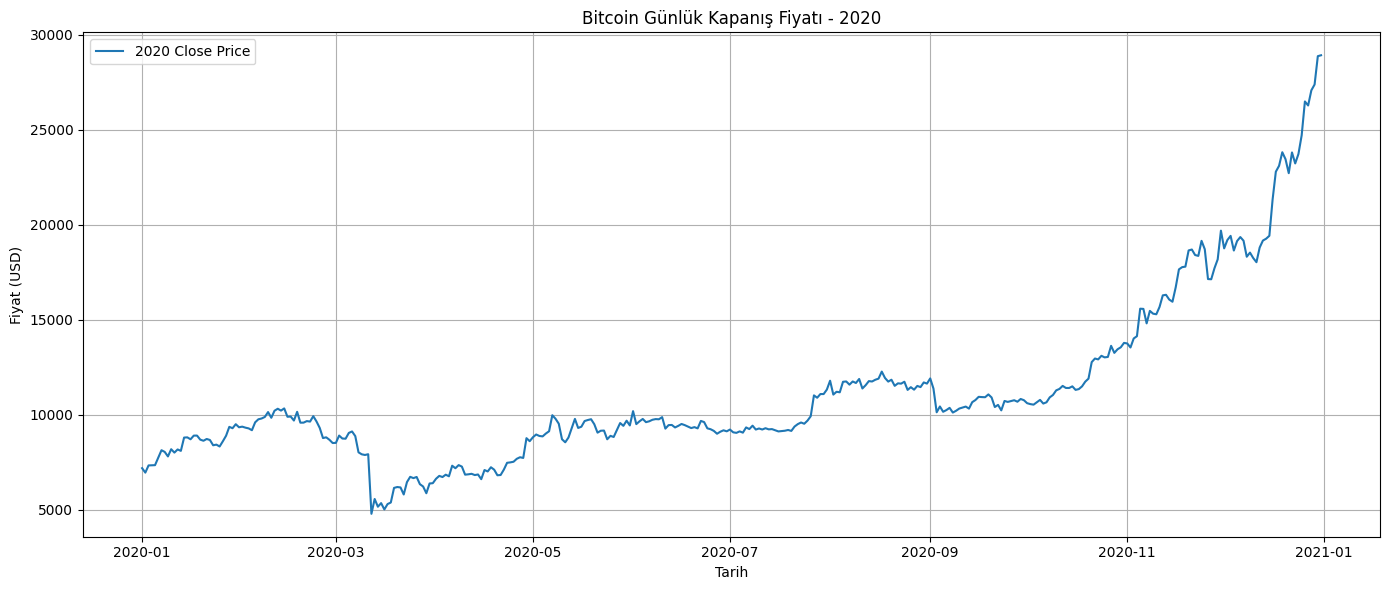

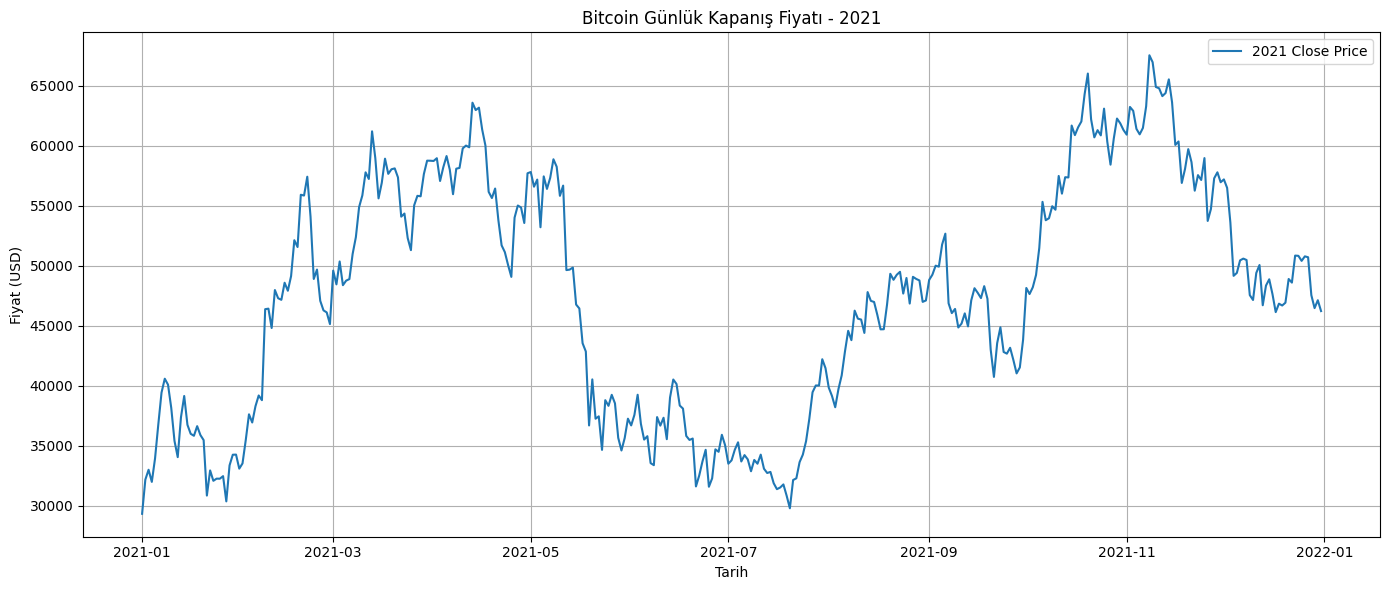

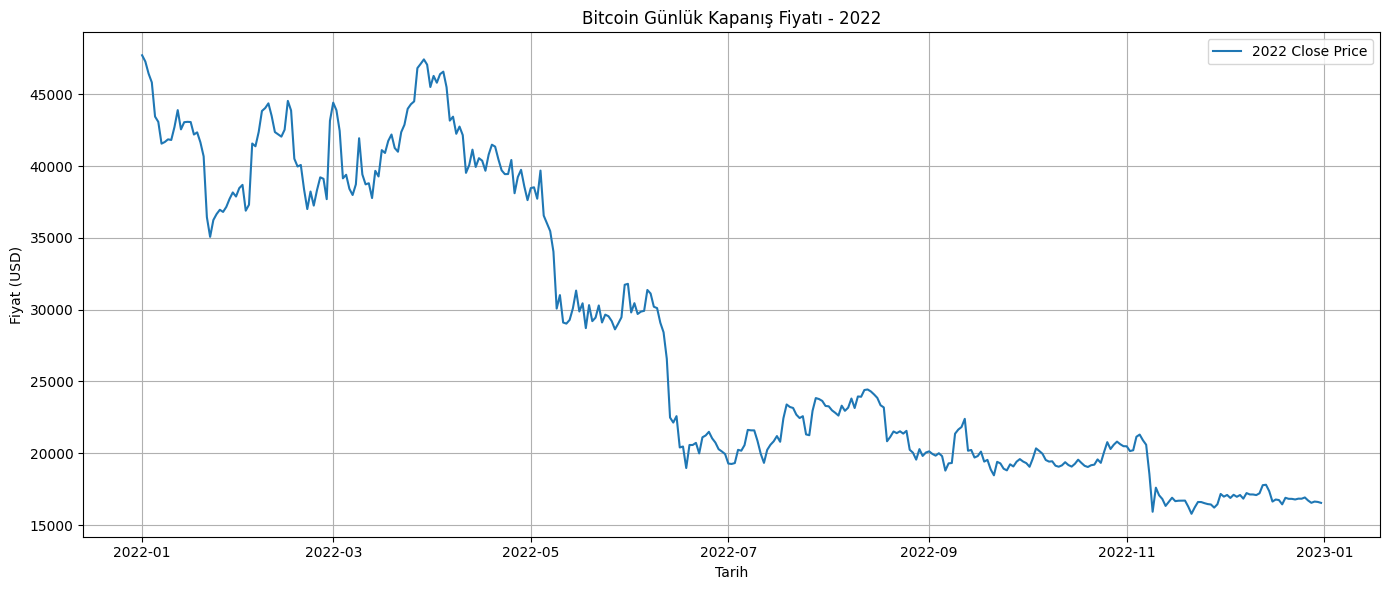

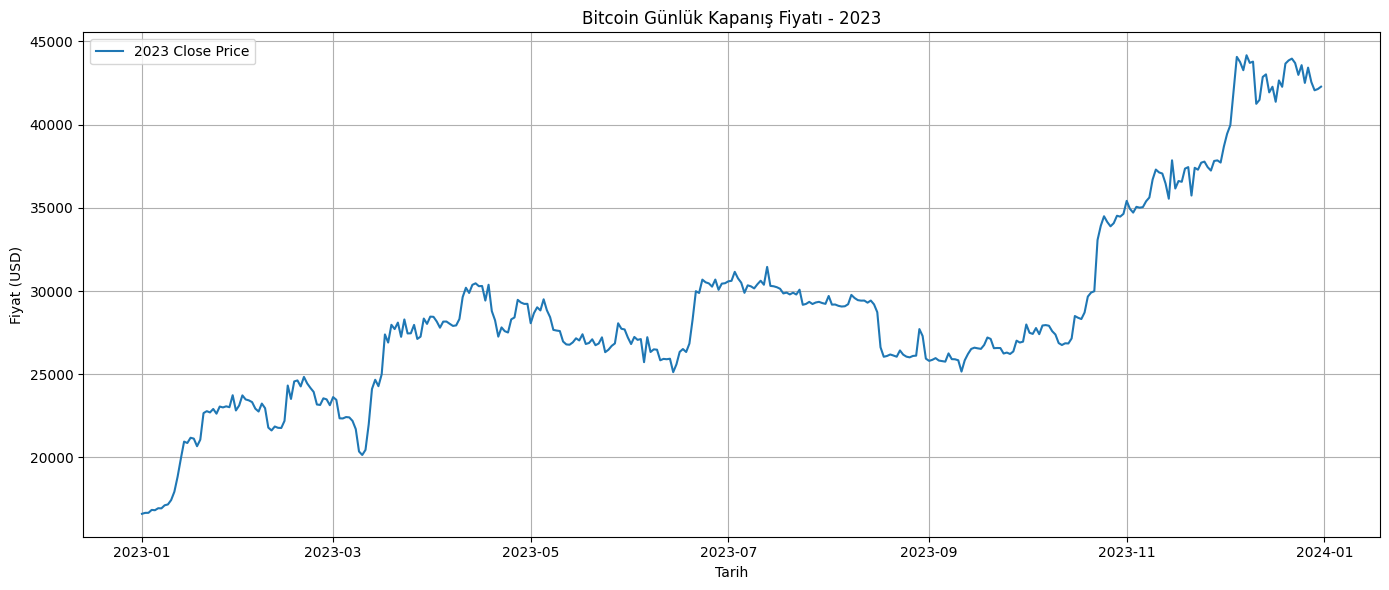

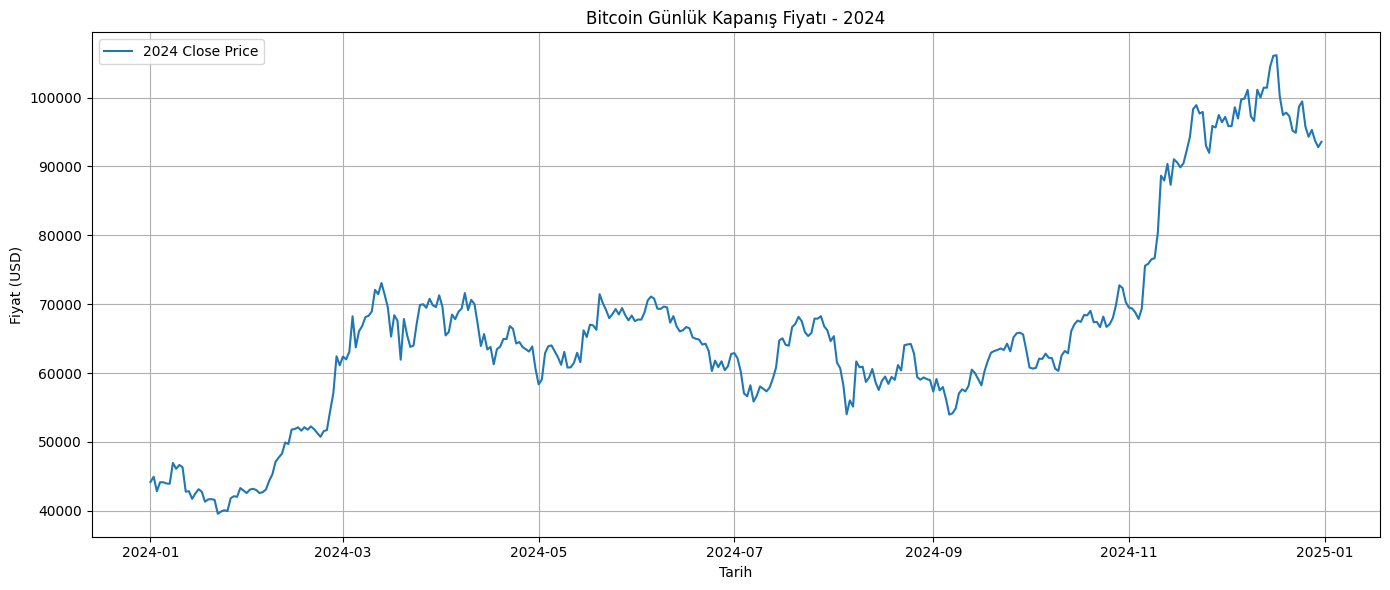

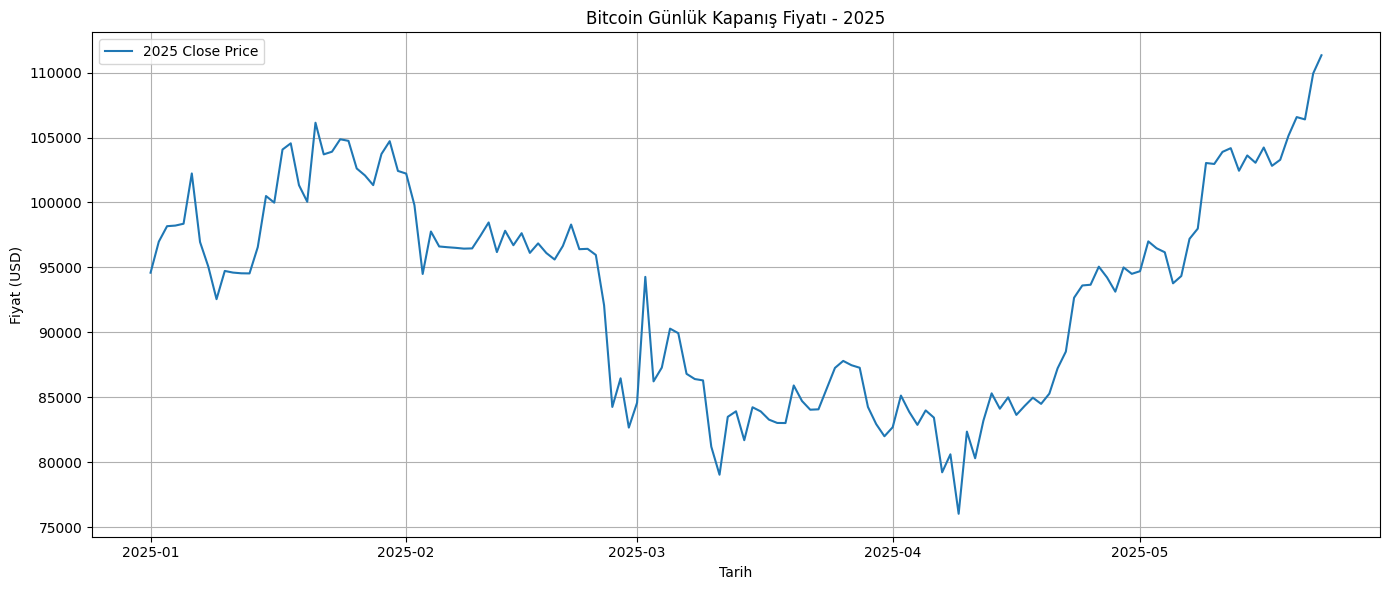

In [55]:
# Yıl sütunu ekleyelim
df['Year'] = df['Open time'].dt.year

# Her yıl için ayrı grafik çizelim
unique_years = df['Year'].unique()

for year in sorted(unique_years):
    df_year = df[df['Year'] == year]
    
    plt.figure(figsize=(14,6))
    plt.plot(df_year['Open time'], df_year['Close'], label=f'{year} Close Price')
    plt.title(f'Bitcoin Günlük Kapanış Fiyatı - {year}')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

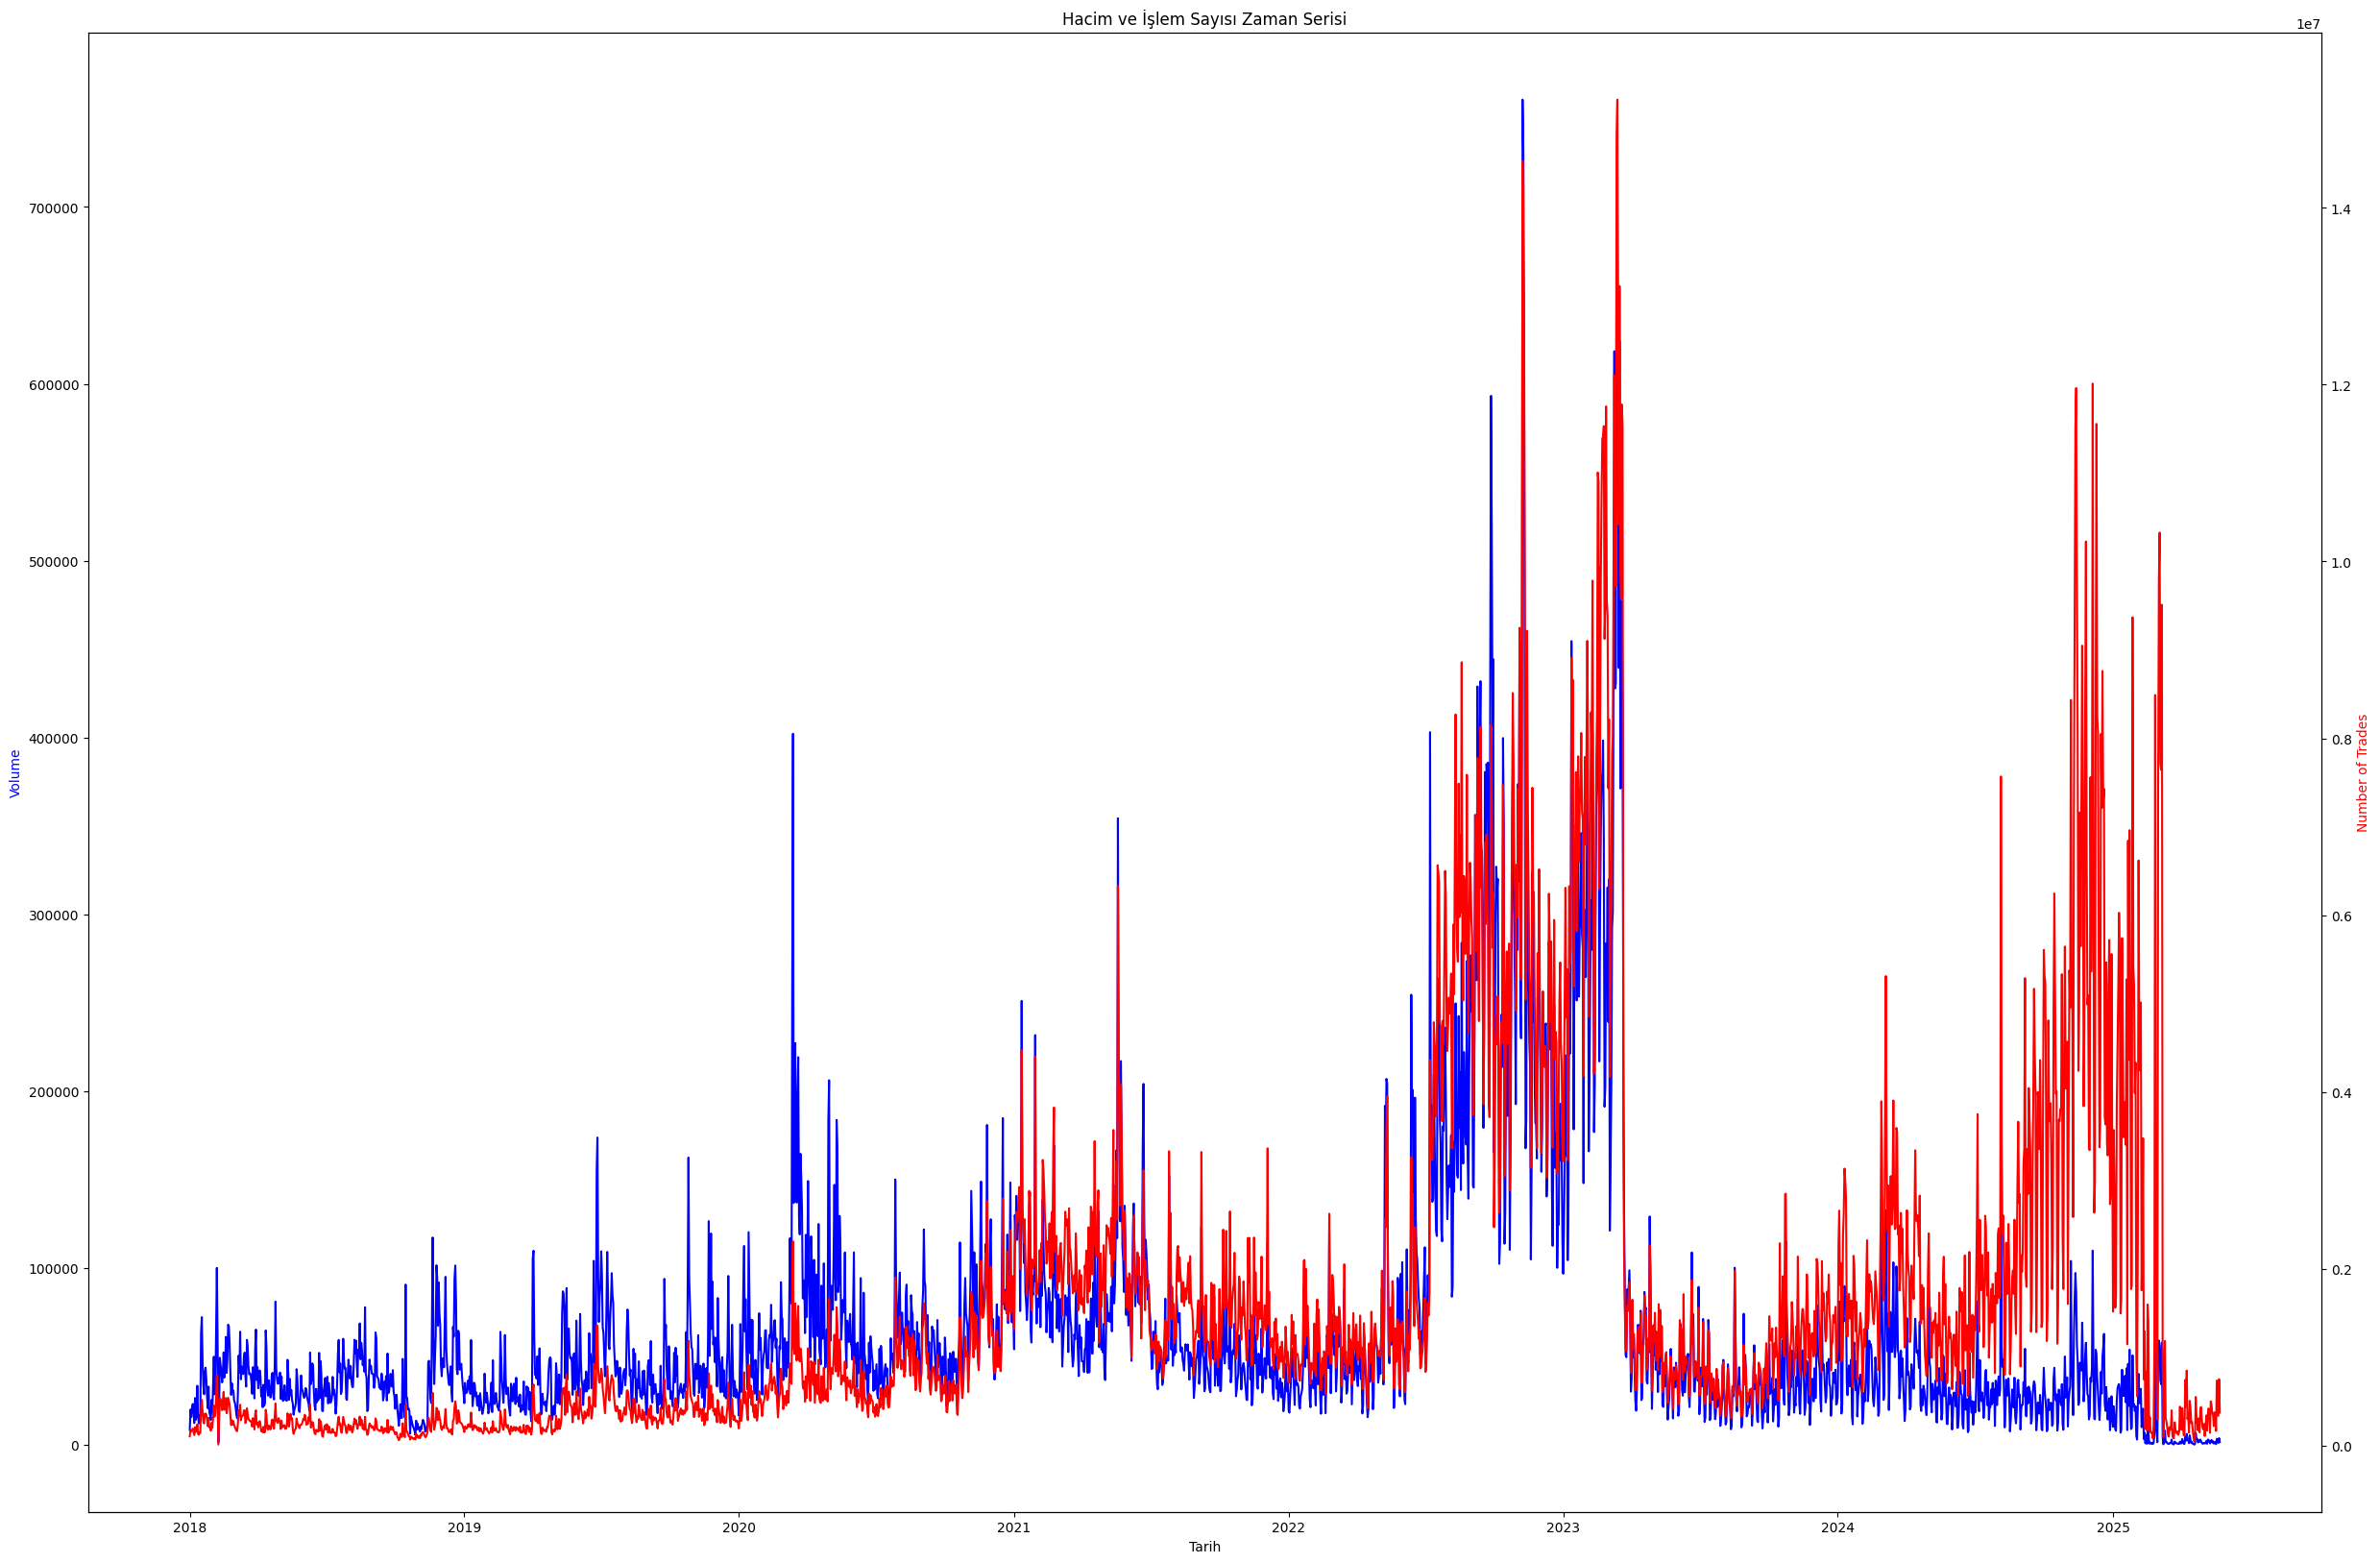

In [56]:
# Hacim ve işlem sayısı zaman içinde birlikte inceleniyor
fig, ax1 = plt.subplots(figsize=(30,20))

ax1.plot(df['Open time'], df['Volume'], color='blue', label='Volume')
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Volume', color='blue')

ax2 = ax1.twinx()
ax2.plot(df['Open time'], df['Number of trades'], color='red', label='Number of Trades')
ax2.set_ylabel('Number of Trades', color='red')

plt.title('Hacim ve İşlem Sayısı Zaman Serisi')
plt.show()

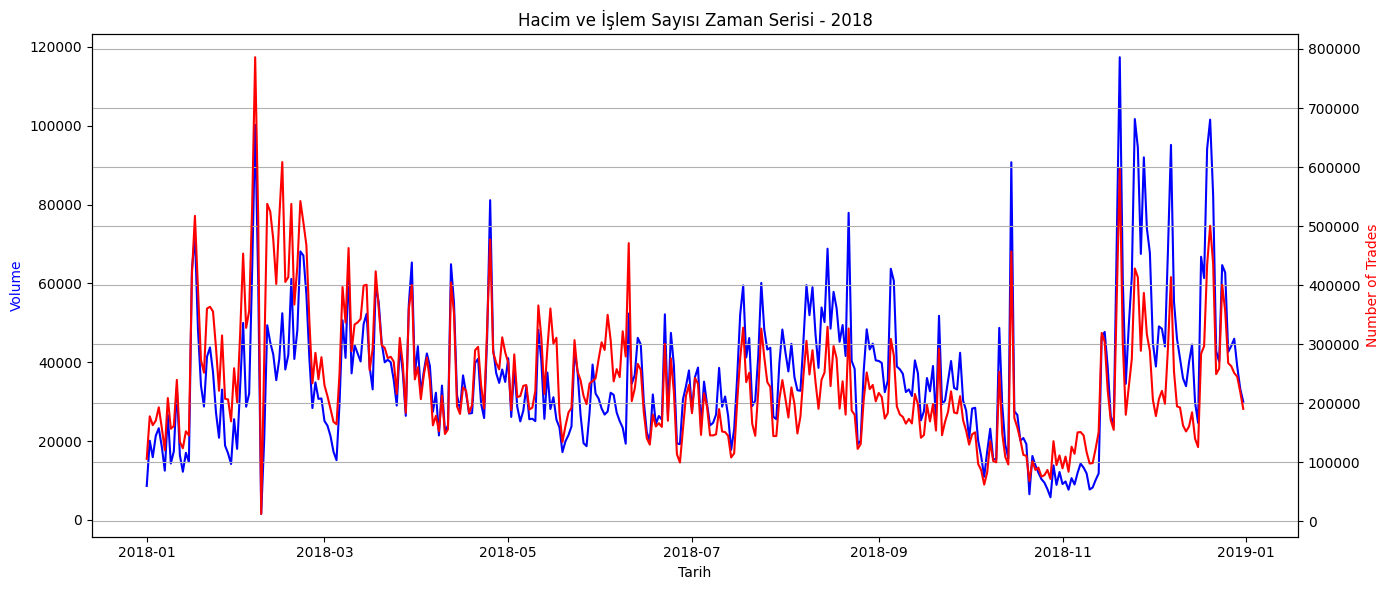

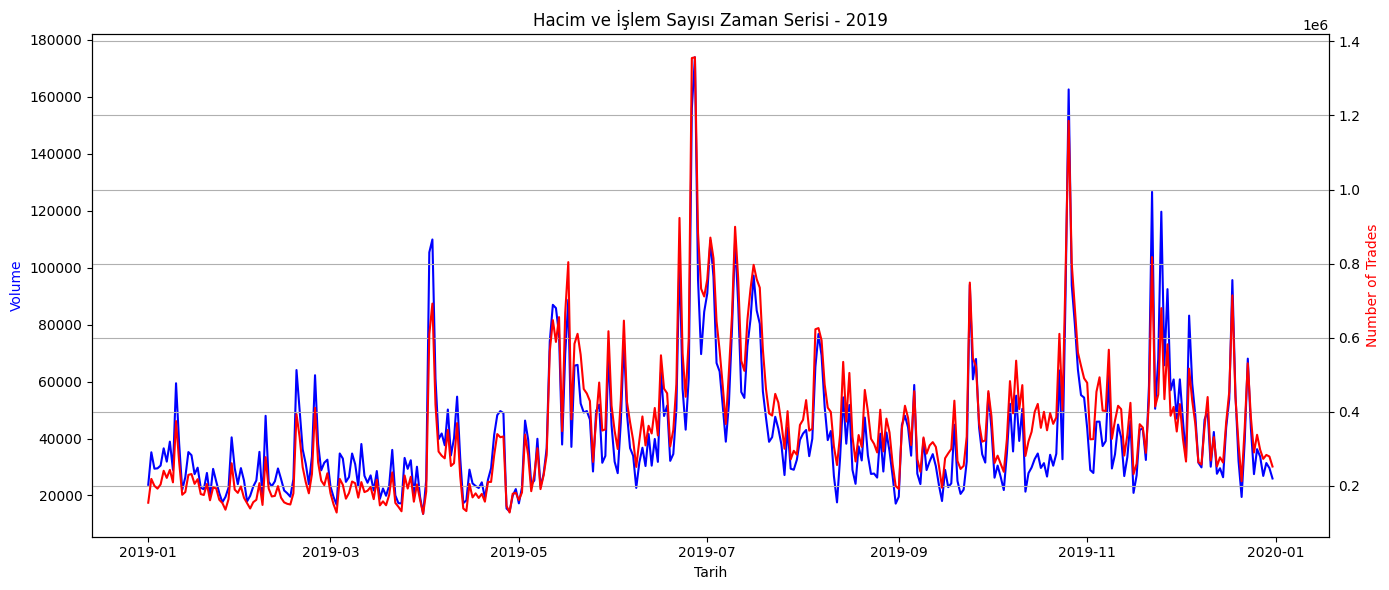

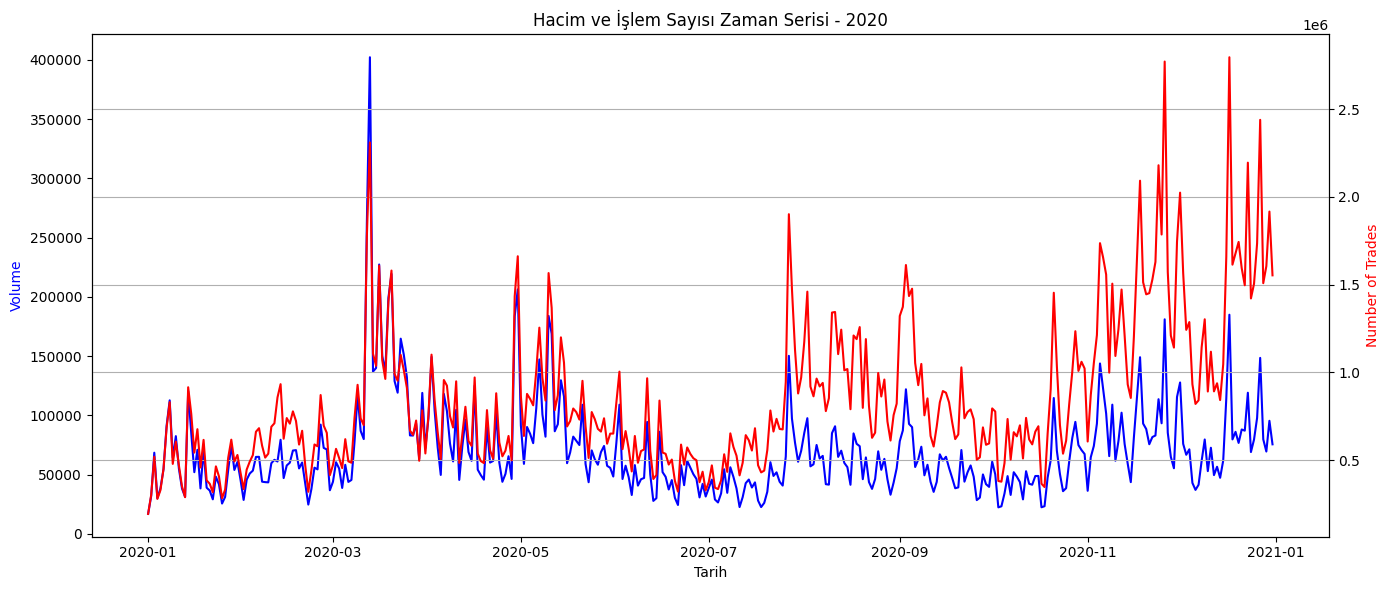

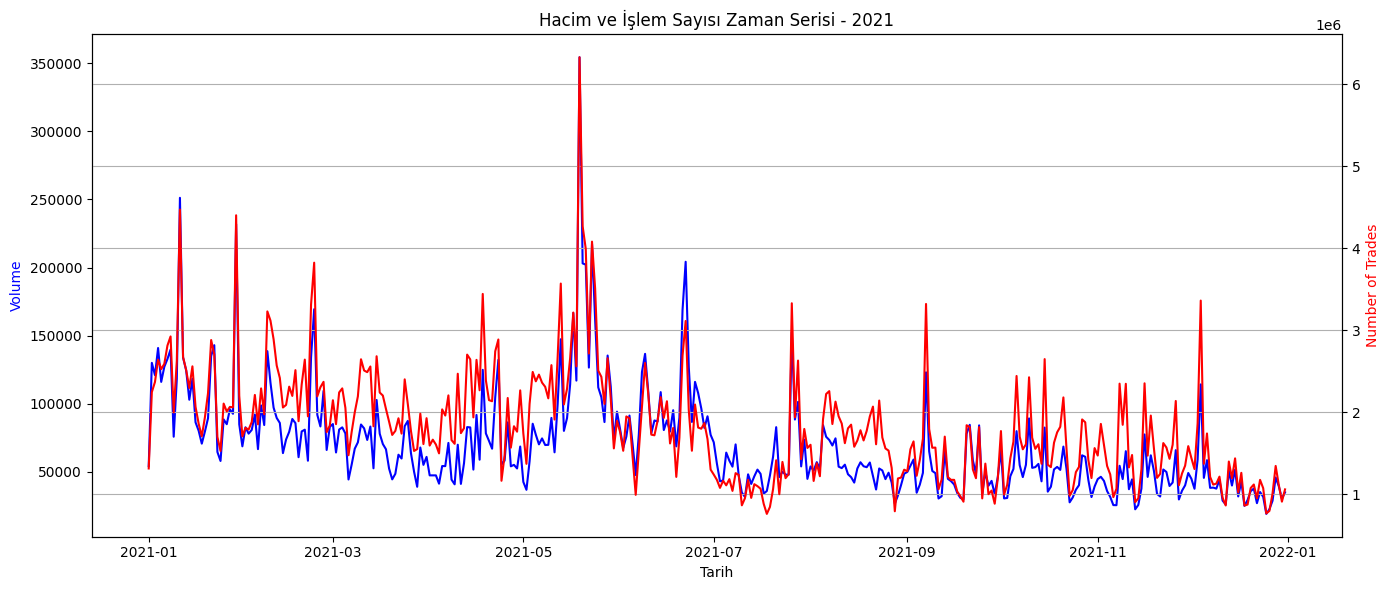

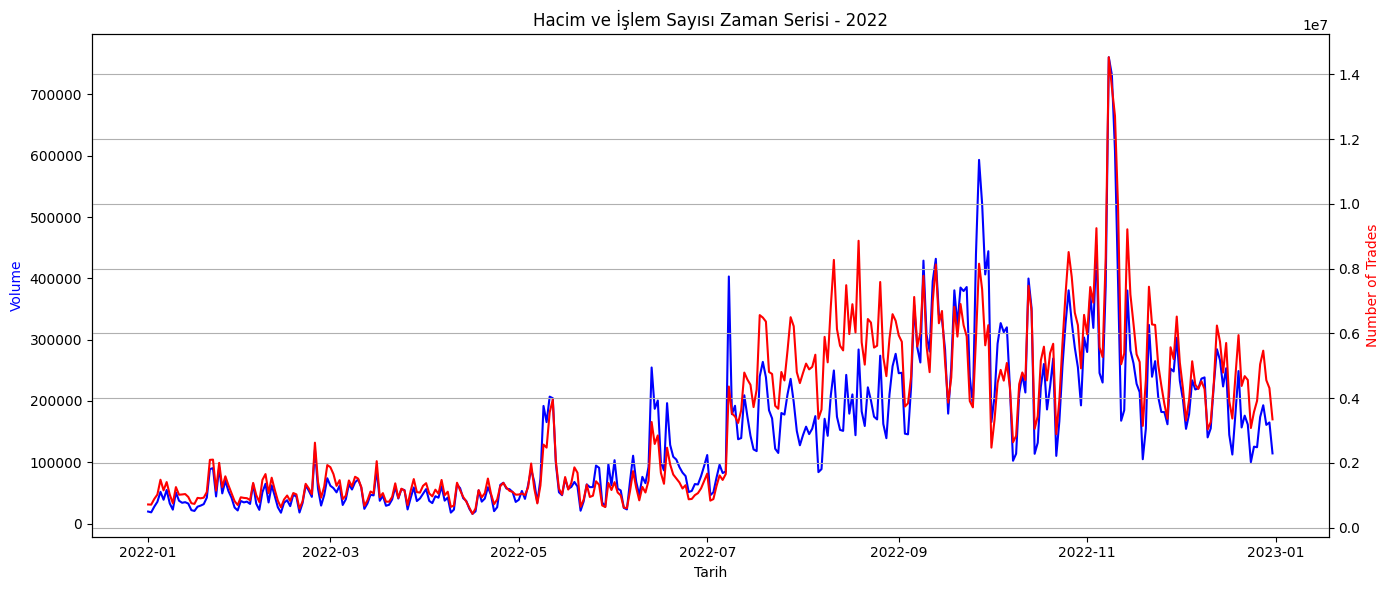

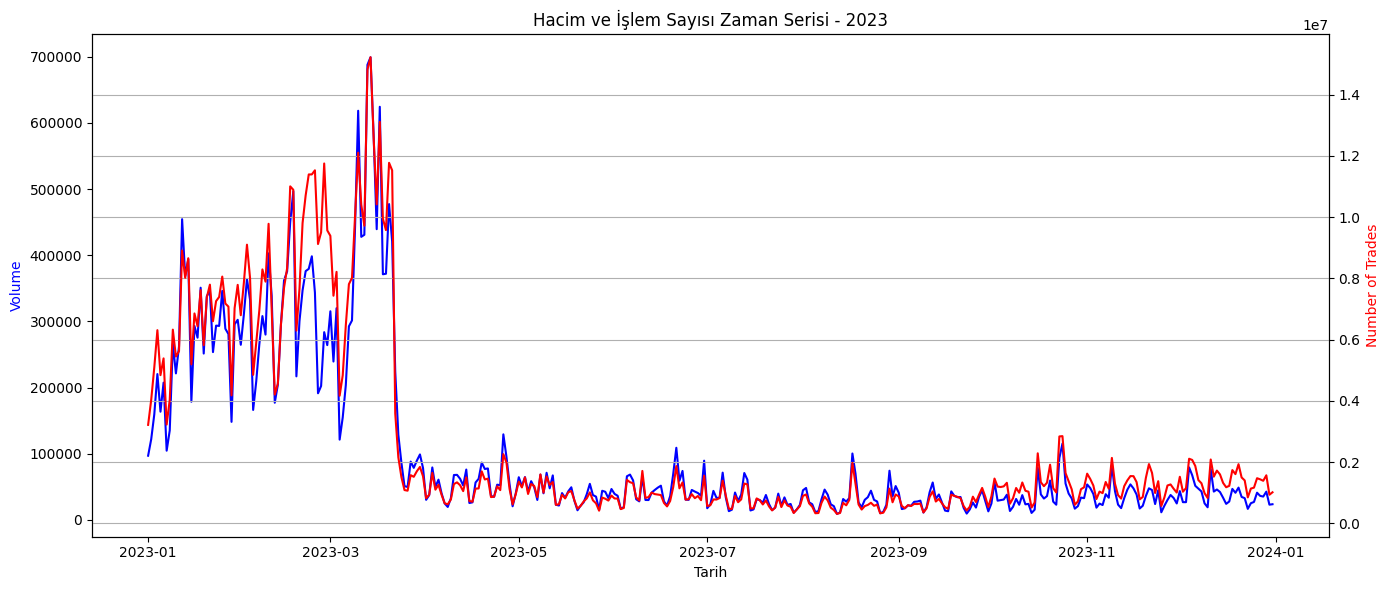

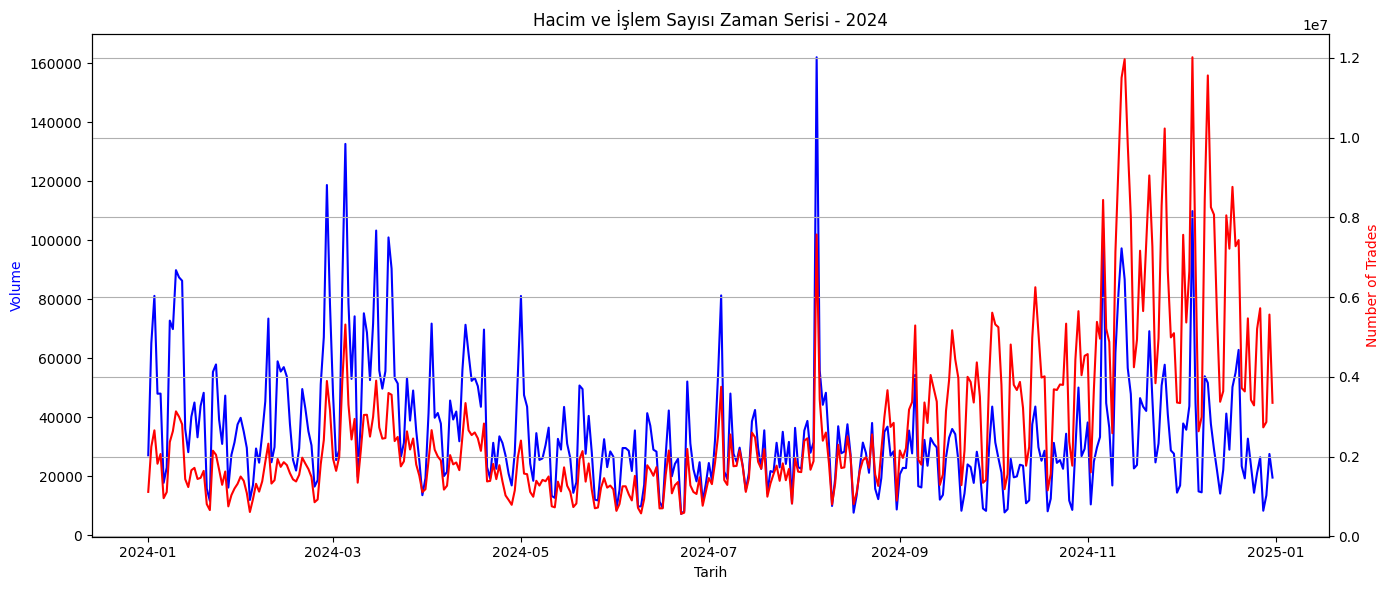

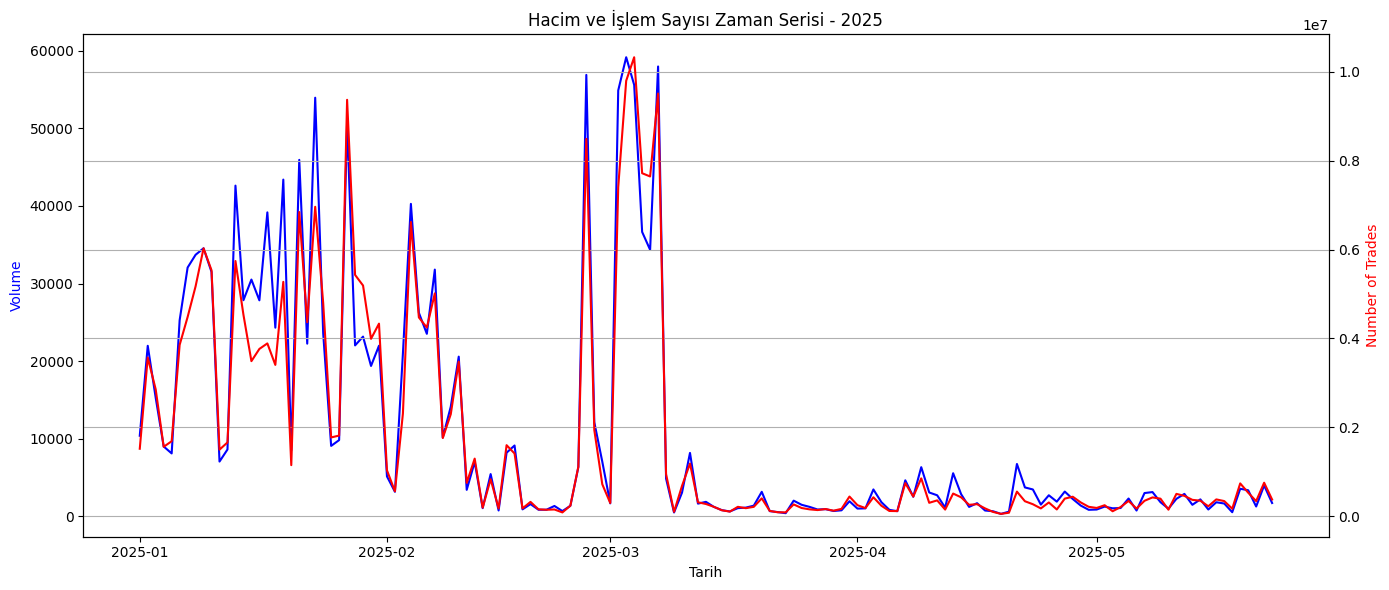

In [57]:
# Her yıl için ayrı grafik çizelim
unique_years = sorted(df['Year'].unique())

for year in unique_years:
    df_year = df[df['Year'] == year]
    
    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.plot(df_year['Open time'], df_year['Volume'], color='blue', label='Volume')
    ax1.set_xlabel('Tarih')
    ax1.set_ylabel('Volume', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(df_year['Open time'], df_year['Number of trades'], color='red', label='Number of Trades')
    ax2.set_ylabel('Number of Trades', color='red')

    plt.title(f'Hacim ve İşlem Sayısı Zaman Serisi - {year}')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

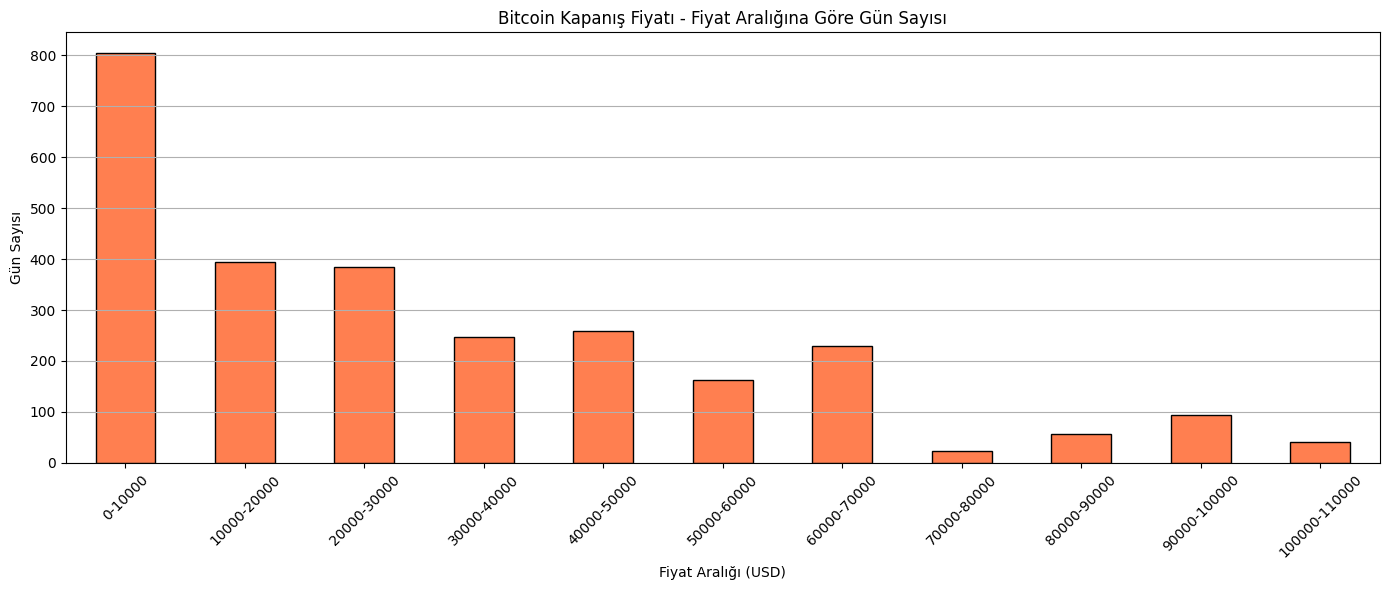

In [58]:
# Aralıkları tanımlayalım
bins = list(range(0, 120000, 10000))  # 0'dan 110k'ya kadar 10k'lık dilimler
labels = [f"{i}-{i+10000}" for i in bins[:-1]]

# Fiyatları bu aralıklara yerleştir
df['Close Range'] = pd.cut(df['Close'], bins=bins, labels=labels, right=False)

# Her aralıkta kaç gün geçmiş?
range_counts = df['Close Range'].value_counts().sort_index()

# Görselleştirme
plt.figure(figsize=(14,6))
range_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Bitcoin Kapanış Fiyatı - Fiyat Aralığına Göre Gün Sayısı')
plt.xlabel('Fiyat Aralığı (USD)')
plt.ylabel('Gün Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


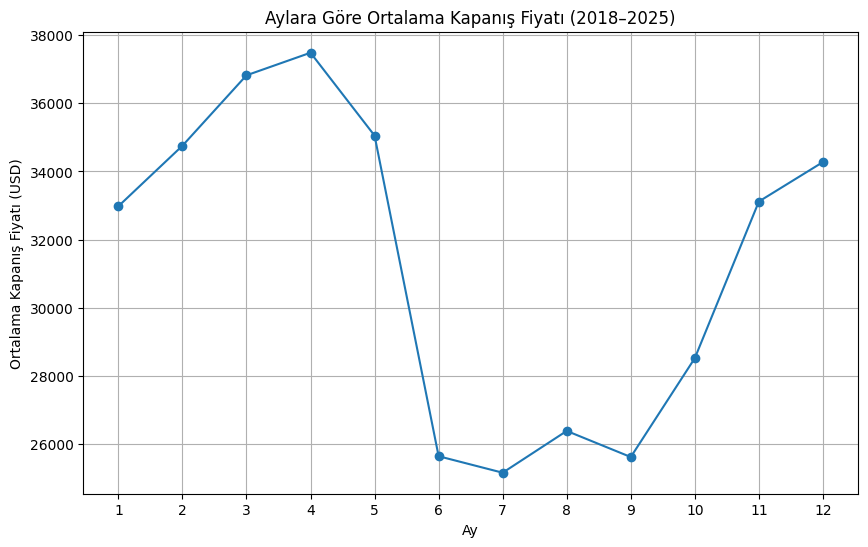

In [59]:
# Ayları çıkarmak için datetime formatına geçtikten sonra:
df['Open time'] = pd.to_datetime(df['Open time'])
df['Month'] = df['Open time'].dt.month

# Her ay için ortalama kapanış fiyatı
monthly_avg = df.groupby('Month')['Close'].mean()

# Çizgi grafik
plt.figure(figsize=(10,6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Aylara Göre Ortalama Kapanış Fiyatı (2018–2025)')
plt.xlabel('Ay')
plt.ylabel('Ortalama Kapanış Fiyatı (USD)')
plt.xticks(range(1,13))
plt.grid()
plt.show()


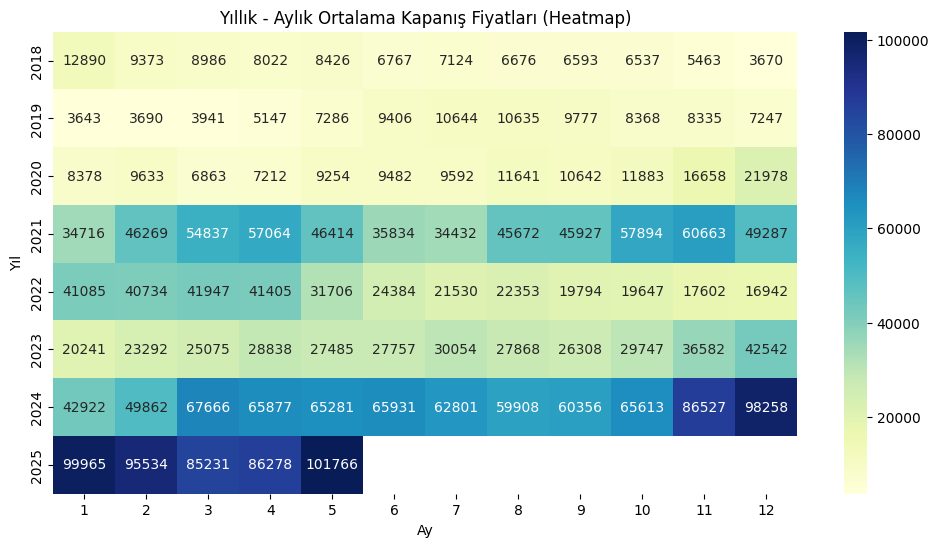

In [60]:
df['Year'] = df['Open time'].dt.year
df['Month'] = df['Open time'].dt.month

pivot_table = df.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Yıllık - Aylık Ortalama Kapanış Fiyatları (Heatmap)')
plt.xlabel('Ay')
plt.ylabel('Yıl')
plt.show()


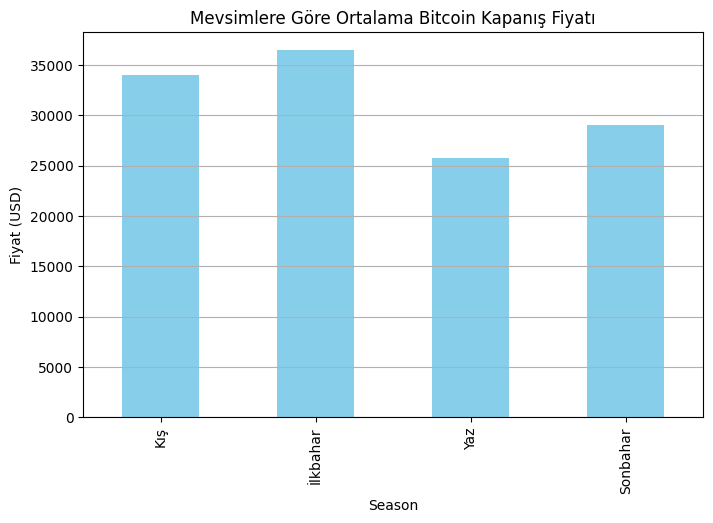

In [61]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

df['Season'] = df['Month'].apply(get_season)

seasonal_avg = df.groupby('Season')['Close'].mean()

# Bar grafiği
plt.figure(figsize=(8,5))
seasonal_avg = seasonal_avg.reindex(['Kış', 'İlkbahar', 'Yaz', 'Sonbahar'])  # Sıralamak için
seasonal_avg.plot(kind='bar', color='skyblue')
plt.title('Mevsimlere Göre Ortalama Bitcoin Kapanış Fiyatı')
plt.ylabel('Fiyat (USD)')
plt.grid(axis='y')
plt.show()


In [62]:
import plotly.express as px

monthly_avg_df = df.groupby(['Year', 'Month'])['Close'].mean().reset_index()
monthly_avg_df['Tarih'] = pd.to_datetime(monthly_avg_df['Year'].astype(str) + '-' + monthly_avg_df['Month'].astype(str))

fig = px.line(monthly_avg_df, x='Tarih', y='Close', title='Yıllara Göre Aylık Ortalama Kapanış Fiyatı',
              labels={'Close': 'Fiyat (USD)'}, markers=True)
fig.show()


Open - Close” (Açılış – Kapanış farkı), yatırımcının o gün “kârda mı, zararda mı” olduğunu anlamamıza yardımcı olur.

In [63]:
df['OC_Change'] = df['Close'] - df['Open']  # Fiyat farkı
df['OC_Percent'] = (df['Close'] - df['Open']) / df['Open'] * 100  # Yüzde fark


In [64]:
positive_days = (df['OC_Change'] > 0).sum()
negative_days = (df['OC_Change'] < 0).sum()
equal_days = (df['OC_Change'] == 0).sum()

print("Pozitif Gün Sayısı:", positive_days)
print("Negatif Gün Sayısı:", negative_days)
print("Eşit Gün Sayısı:", equal_days)


Pozitif Gün Sayısı: 1384
Negatif Gün Sayısı: 1316
Eşit Gün Sayısı: 0


In [65]:
df['Year'] = df['Open time'].dt.year
df['Month'] = df['Open time'].dt.month

# Yıllık bazda pozitif gün oranı
yearly_trend = df.groupby('Year')['OC_Change'].apply(lambda x: (x > 0).mean())
print(yearly_trend)


Year
2018    0.501370
2019    0.517808
2020    0.576503
2021    0.504110
2022    0.457534
2023    0.504110
2024    0.524590
2025    0.517483
Name: OC_Change, dtype: float64


In [66]:
print("Ortalama Günlük Fiyat Değişimi: ", df['OC_Change'].mean())
print("Ortalama Günlük Yüzdelik Değişim: ", df['OC_Percent'].mean())


Ortalama Günlük Fiyat Değişimi:  30.36644444444441
Ortalama Günlük Yüzdelik Değişim:  0.1350637592155852


1. Fiyat Değişimi Pozitif
Bu, ortalama olarak Bitcoin’in her gün 30 dolara yakın değer kazandığı anlamına geliyor. Bu pozitif yönlü bir baskıya işaret eder.

2. Yüzdelik Değişim Pozitif
%0.135'lik günlük ortalama artış, yıllık bileşik etkiyle ciddi bir yukarı yönlü trend demektir

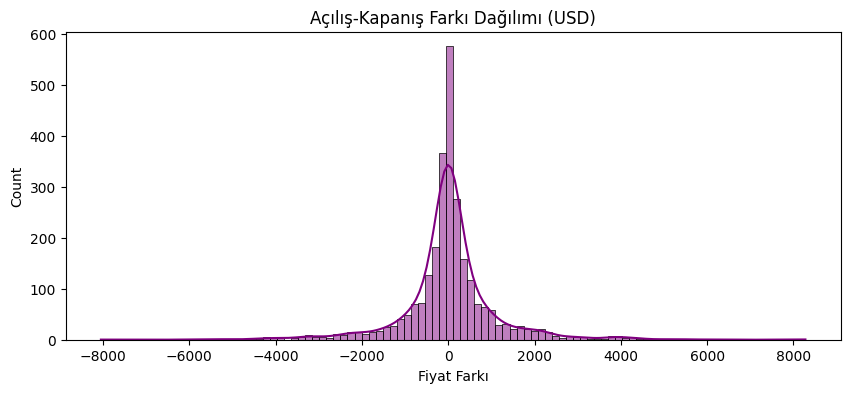

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.histplot(df['OC_Change'], bins=100, kde=True, color='purple')
plt.title('Açılış-Kapanış Farkı Dağılımı (USD)')
plt.xlabel('Fiyat Farkı')
plt.show()
